Multi arm Bandit: This excersise demonstrates various approach of estimating the underling density of the reward of each arm in T no. of trials.  

1) Greedy Approach


2) Softmax

3) UCB

4) Thompson Sampling

5) Reinforce

# 1) Greedy Approach:

Action_arm= $arg~ max_{a} Q_{t}(a)$
where a denotes arm indexing, (i.e. $1 \leq a \leq K$) and t denotes the tern indexing in each trajectory. (i.e. $1 \leq t \leq T$ )

Performance measure:

$Regret_{t}=q^{*}T-\sum_{a=1}^{K}E\{T_{t}(a)\}Q_{t}(a) = \sum_{a=1, \neq *}^{K}(q^{*}-Q(a))E\{T_{t}(a)\} \propto E\{T_{t}(a)\}$

i.e the number of times the suboptimal arm is pulled in the experiment. 

## 1) Greedy approach:
1. No. of arms
2. True probability of arms to give reward as 1 (considering bernoli reward distibution of arms)
3. No. of turns want to play
4. No. Trajectories want to play 
5. Warm up trails (Greedy)

In [2]:
%matplotlib inline
import random, math

import matplotlib.pyplot as plt
import numpy as np
# seeding the network to get reproducible results
from numpy.random import seed



In [5]:
# step 2: define the function for sampling of bernolli R.V from a uniform density.

def bernoulli_sample(prob):
    n = random.random()         # returns a value in [0,1)
    if n<=prob:
        return 1
    else:
        return 0
# initialize the parameters
def initialization():
    K = 2 # number of arms
    p = [0.8, 0.6] # bernoulli parameter p of each arm
    #p = [0.1, 0.2, 0.3, 0.2, 0.2] 
    T = 100000 # number of steps
    R = 20 # number of runs
    time_steps = T
    runs = R
    n_arms = K
    arms_prob = []
    arms_prob =  p
    return (time_steps, runs, int(n_arms), arms_prob)

def performance(regret,optimal):
  total_regret_array=[]
  total_opt_array=[]
  regret = np.transpose(regret)
  optimal=np.transpose(optimal)
  for r in range(regret.shape[0]):
    #print(regret.shape[0])
    total_regret_array.append(np.cumsum(regret[r]))
    total_opt_array.append(np.cumsum(optimal[r]))
  cum_regret_per_turn = np.mean(total_regret_array, axis=0) # to be plotted Cumulated regreat/traj
  avg_regret_per_turn = np.mean(regret, axis=0)# 1XT
  cum_opt_per_turn= np.mean(total_opt_array, axis=0) # to be plotted Cumulated optimal/traj
  return cum_regret_per_turn, avg_regret_per_turn, cum_opt_per_turn



In [6]:
  ##### Greedy ######
seed(0)
T, R, N, P = initialization()
regret = np.zeros((T+1, R))  # no of time the suboptimal arm is picked (mu_opt*T-sum(mui*ni),1<i<N)
optimal_arm_pulled = np.zeros((T+1, R))
optimal_arm = P.index(max(P))  # optimal arm

init=1# no of initial turns used for initial selection in greedy based approach (exploitation)

In [ ]:

for r in range(R):
    total_reward = 0
    total_optimal = 0
    

    # initial value calculations
    q_values = [0]*N #[0 0] (N=2)initialization of running estimation of arms reward
     # optimal arm selection

    nt_values = [0]*N # [0 0] (N=2)
    init_nt_values=[0]*N
    print("run:greedy", r+1)
    for i in range(0,N):
        for j in range(0,init):
            current_reward = bernoulli_sample(P[i])
            q_n_1 = q_values[i]
            init_nt_values[i]=init_nt_values[i]+1
            q_values[i] = # write the recursive q update equation here

    # Reset presumed_optimal_arm for each run
    presumed_optimal_arm_temp = # find the arm which have maximum q_values
    presumed_optimal_arm = presumed_optimal_arm_temp

    for t in range(1, T+1):

        #go_for_presumed_optimal = bernoulli_sample(1-epsilon)
        current_reward = bernoulli_sample(P[presumed_optimal_arm])
        selected_arm = presumed_optimal_arm
        

        if selected_arm == optimal_arm:
            optimal_arm_pulled[t,r] = 1            
        else:
            regret[t, r] = 1
        

        # Re-calculate presumed_optimal_arm
        q_n_1 = q_values[selected_arm]
        nt_values[selected_arm] = nt_values[selected_arm] + 1
        q_values[selected_arm] = # write the recursive q update equation here
        presumed_optimal_arm = # find the arm which have maximum q_values

    print(np.sum(optimal_arm_pulled[:,r]))
    
    



run:greedy 1
99957.0
run:greedy 2
100000.0
run:greedy 3
100000.0
run:greedy 4
99999.0
run:greedy 5
99999.0
run:greedy 6
99999.0
run:greedy 7
99999.0
run:greedy 8
99998.0
run:greedy 9
100000.0
run:greedy 10
99997.0
run:greedy 11
0.0
run:greedy 12
100000.0
run:greedy 13
100000.0
run:greedy 14
99999.0
run:greedy 15
1.0
run:greedy 16
99999.0
run:greedy 17
100000.0
run:greedy 18
0.0
run:greedy 19
100000.0
run:greedy 20
100000.0


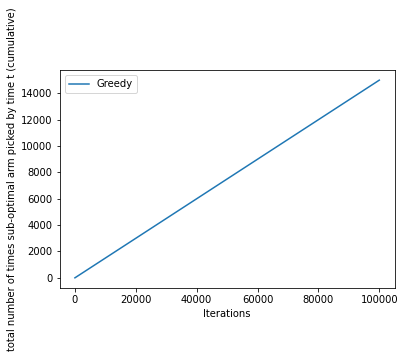

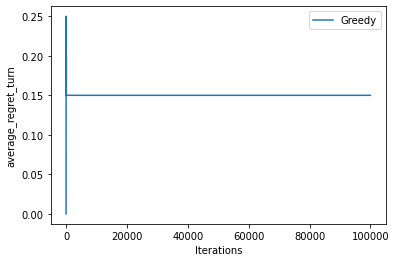

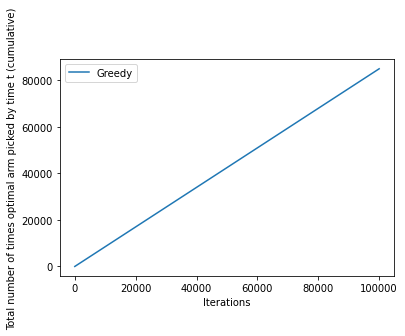

In [ ]:

cum_reg,avg_reg,cum_opt=performance(regret,optimal_arm_pulled)

plt.plot(cum_reg, label='Greedy')
plt.xlabel('Iterations')
plt.ylabel('total number of times sub-optimal arm picked by time t (cumulative)')
plt.legend()
plt.show()

plt.plot(avg_reg, label='Greedy')
plt.xlabel('Iterations')
plt.ylabel('average_regret_turn')
plt.legend()
plt.show()

plt.plot(cum_opt, label='Greedy')
plt.xlabel('Iterations')
plt.ylabel('Total number of times optimal arm picked by time t (cumulative)')
plt.legend()
plt.show()

## Epsilon Greedy approach

**if** random_uniform(1)< (1-$\epsilon$)

*Action_arm= $arg~ max_{a} Q_{t}(a)$*

**else** 

*Action_arm=randomint_uniform(1,K)*

**end**


where a denotes arm indexing, (i.e. $1 \leq a \leq K$) and t denotes the tern indexing in each trajectory. (i.e. $1 \leq t \leq T$ )

Performance measure:

$Regret_{t}=q^{*}T-\sum_{a=1}^{K}E\{T_{t}(a)\}Q_{t}(a) \propto \sum_{a=1, \neq *}^{K}(q^{*}-Q(a))E\{T_{t}(a)\}$

i.e the number of times the suboptimal arm is pulled in the experiment.

run:epsilon-greedy (fixed) 1
run:epsilon-greedy (fixed) 2
run:epsilon-greedy (fixed) 3
run:epsilon-greedy (fixed) 4
run:epsilon-greedy (fixed) 5
run:epsilon-greedy (fixed) 6
run:epsilon-greedy (fixed) 7
run:epsilon-greedy (fixed) 8
run:epsilon-greedy (fixed) 9
run:epsilon-greedy (fixed) 10
run:epsilon-greedy (fixed) 11
run:epsilon-greedy (fixed) 12
run:epsilon-greedy (fixed) 13
run:epsilon-greedy (fixed) 14
run:epsilon-greedy (fixed) 15
run:epsilon-greedy (fixed) 16
run:epsilon-greedy (fixed) 17
run:epsilon-greedy (fixed) 18
run:epsilon-greedy (fixed) 19
run:epsilon-greedy (fixed) 20


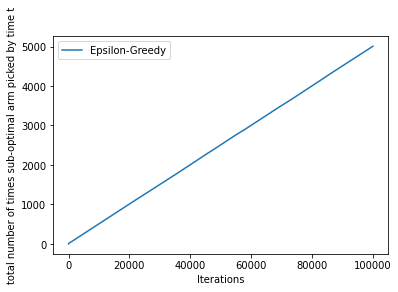

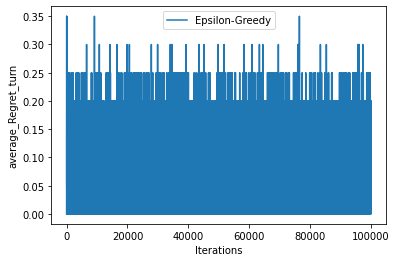

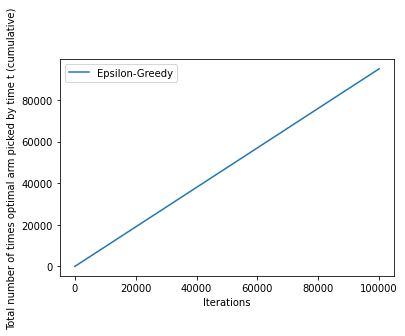

In [ ]:
##### epsilon-greedy (fixed) ######
seed(0)
T, R, N, P = initialization()
regret = np.zeros((T+1, R))  # no of time the suboptimal arm is picked (mu_opt*T-sum(mui*ni),1<i<N)
optimal_arm_pulled = np.zeros((T+1, R))
optimal_arm = P.index(max(P))


epsilon = 0.1

for r in range(R):
    total_reward = 0
    total_optimal = 0
    count_optimal = []

    # initial value calculations
    q_values = [0]*N
    presumed_optimal_arm_temp = np.argmax(q_values)

    nt_values = [0]*N

    print("run:epsilon-greedy (fixed)", r+1)
    # Reset presumed_optimal_arm for each run
    presumed_optimal_arm = presumed_optimal_arm_temp

    for t in range(1, T+1):

        go_for_presumed_optimal = bernoulli_sample(#??) # write the probability in which you want to select optimal arm 

        if go_for_presumed_optimal:
            current_reward = bernoulli_sample(P[presumed_optimal_arm])
            selected_arm = presumed_optimal_arm
        else:
            #choose equally likely one of the arms
            n = random.choice(range(N)) # index of arm chosen
            current_reward =  bernoulli_sample(P[n])
            selected_arm = n

        

        if selected_arm == optimal_arm:
            optimal_arm_pulled[t,r] = 1
            
        else:
            regret[t, r] = 1
        

        # Re-calculate presumed_optimal_arm
        q_n_1 = q_values[selected_arm]
        nt_values[selected_arm] = nt_values[selected_arm] + 1
        q_values[selected_arm] = # write the recursive q update equation here
        presumed_optimal_arm = # find the arm which have maximum q_values
    

eg_cum_reg,eg_avg_reg,eg_cum_opt=performance(regret,optimal_arm_pulled)

plt.plot(eg_cum_reg, label='Epsilon-Greedy')
plt.xlabel('Iterations')
plt.ylabel('total number of times sub-optimal arm picked by time t')
plt.legend()
plt.show()

plt.plot(eg_avg_reg, label='Epsilon-Greedy')
plt.xlabel('Iterations')
plt.ylabel('average_Regret_turn')
plt.legend()
plt.show()

plt.plot(eg_cum_opt, label='Epsilon-Greedy')
plt.xlabel('Iterations')
plt.ylabel('Total number of times optimal arm picked by time t (cumulative)')
plt.legend()
plt.show()



In [ ]:
print(eg_cum_reg)

[0.00000e+00 5.00000e-02 1.00000e-01 ... 5.00725e+03 5.00725e+03
 5.00735e+03]


In [ ]:
len(q_values)

2

## Variable epsilon greedy

$\epsilon$ value will be initialized to a higher value and decayed with respect to the number of turns (high exploration initially and gradually decaying)

run epsilon-greedy (Variable) 1
run epsilon-greedy (Variable) 2
run epsilon-greedy (Variable) 3
run epsilon-greedy (Variable) 4
run epsilon-greedy (Variable) 5
run epsilon-greedy (Variable) 6
run epsilon-greedy (Variable) 7
run epsilon-greedy (Variable) 8
run epsilon-greedy (Variable) 9
run epsilon-greedy (Variable) 10
run epsilon-greedy (Variable) 11
run epsilon-greedy (Variable) 12
run epsilon-greedy (Variable) 13
run epsilon-greedy (Variable) 14
run epsilon-greedy (Variable) 15
run epsilon-greedy (Variable) 16
run epsilon-greedy (Variable) 17
run epsilon-greedy (Variable) 18
run epsilon-greedy (Variable) 19
run epsilon-greedy (Variable) 20


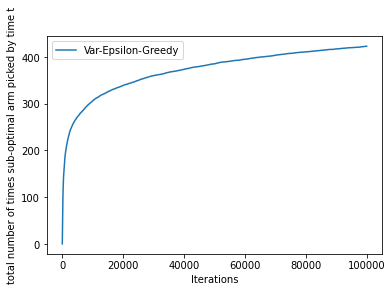

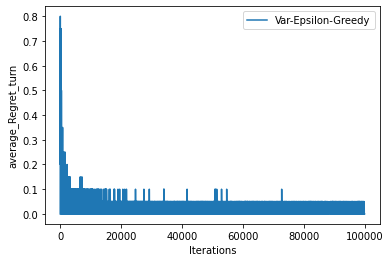

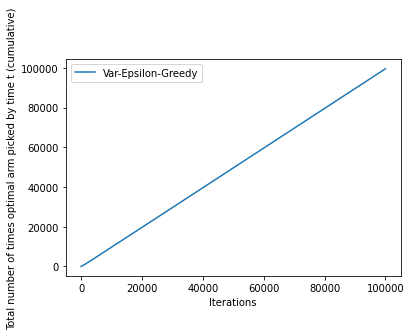

In [ ]:
##### epsilon-greedy (Variable) ######
seed(0)
T, R, N, P = initialization()
regret = np.zeros((T+1, R))
optimal_arm_pulled = np.zeros((T+1, R))
optimal_arm = P.index(max(P))


for r in range(R):
    total_reward = 0
    total_optimal = 0
    percentage_optimal = []

    # initial value calculation
    q_values = [0]*N
    presumed_optimal_arm_temp = np.argmax(q_values)

    nt_values = [0]*N

    print("run epsilon-greedy (Variable)", r+1)
    # Reset presumed_optimal_arm for each run
    presumed_optimal_arm = presumed_optimal_arm_temp

    new_epsilon = 1
    for t in range(1, T+1):
        if(t%100 == 0):
            new_epsilon = 1/(t/100)
        epsilon = new_epsilon

        go_for_presumed_optimal = bernoulli_sample(#??)

        if go_for_presumed_optimal:
            current_reward = bernoulli_sample(P[presumed_optimal_arm])
            selected_arm = presumed_optimal_arm
        else:
            #choose equally likely one of the arms
            n = random.choice(range(N)) # index of arm chosen
            current_reward =  bernoulli_sample(#??)
            selected_arm = n

        

        if selected_arm == optimal_arm:
            optimal_arm_pulled[t,r] = 1
            
        else:
            regret[t, r] = 1
        

        # Re-calculate presumed_optimal_arm
        q_n_1 = q_values[selected_arm]
        nt_values[selected_arm] = nt_values[selected_arm] + 1
        q_values[selected_arm] = # write the recursive q update equation here
        presumed_optimal_arm = # find the arm which have maximum q_values

veg_cum_reg,veg_avg_reg,veg_cum_opt=performance(regret,optimal_arm_pulled)

plt.plot(veg_cum_reg, label='Var-Epsilon-Greedy')
plt.xlabel('Iterations')
plt.ylabel('total number of times sub-optimal arm picked by time t')
plt.legend()
plt.show()

plt.plot(veg_avg_reg, label='Var-Epsilon-Greedy')
plt.xlabel('Iterations')
plt.ylabel('average_Regret_turn')
plt.legend()
plt.show()

plt.plot(veg_cum_opt, label='Var-Epsilon-Greedy')
plt.xlabel('Iterations')
plt.ylabel('Total number of times optimal arm picked by time t (cumulative)')
plt.legend()
plt.show()




# 2) Softmax
$arm_{prob}=\frac{e^{q(a)/temp}}{\sum_{a=1}^{K}e^{q(a)/temp}}$

Action-arm=$random_{toss}(arm_{prob})$

In [ ]:
def softmax_select_arm(q,temp):
  samples = []
  denominator = 0
  aux_exp = np.exp((np.array(q)/temp))
  samples = # insert your code here (refer equation)
  index = np.random.choice(len(q),1,p=samples)[0] # picks one arm based on softmax probability
  return index



In [ ]:
 ##### Softmax ######
seed(0)
T, R, N, P = initialization()
regret = np.zeros((T+1, R))  # no of time the suboptimal arm is picked (mu_opt*T-sum(mui*ni),1<i<N)
optimal_arm_pulled = np.zeros((T+1, R))
optimal_arm = P.index(max(P))  # optimal arm


In [ ]:
len(nt_values)
print(np.sum(nt_values))


100000


softmax (fixed temp) 1
softmax (fixed temp) 2
softmax (fixed temp) 3
softmax (fixed temp) 4
softmax (fixed temp) 5
softmax (fixed temp) 6
softmax (fixed temp) 7
softmax (fixed temp) 8
softmax (fixed temp) 9
softmax (fixed temp) 10
softmax (fixed temp) 11
softmax (fixed temp) 12
softmax (fixed temp) 13
softmax (fixed temp) 14
softmax (fixed temp) 15
softmax (fixed temp) 16
softmax (fixed temp) 17
softmax (fixed temp) 18
softmax (fixed temp) 19
softmax (fixed temp) 20


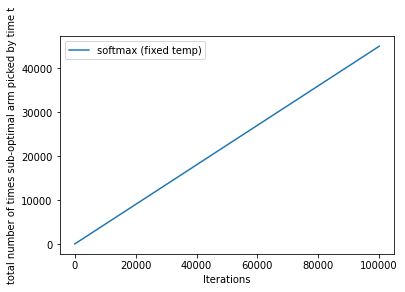

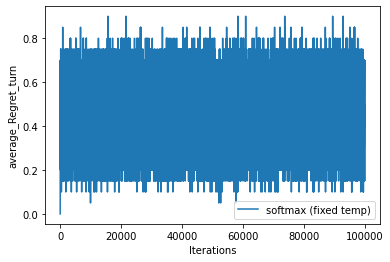

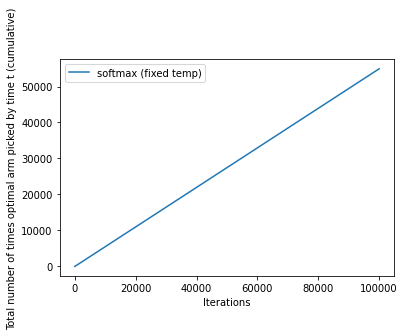

In [ ]:
temp = 1

for r in range(R):
    total_reward = 0
    total_optimal = 0
    count_optimal = []

    # initial value calculations
    q_values = [0]*N
    presumed_optimal_arm_temp = softmax_select_arm(q_values,temp)

    nt_values = [0]*N

    print("softmax (fixed temp)", r+1)
    # Reset presumed_optimal_arm for each run
    presumed_optimal_arm = presumed_optimal_arm_temp

    for t in range(1, T+1):

        current_reward = bernoulli_sample(P[presumed_optimal_arm])
        selected_arm = presumed_optimal_arm

        if selected_arm == optimal_arm:
            optimal_arm_pulled[t,r] = 1
            
        else:
            regret[t, r] = 1
        

        # Re-calculate presumed_optimal_arm
        q_n_1 = q_values[selected_arm]
        nt_values[selected_arm] = nt_values[selected_arm] + 1
        q_values[selected_arm] = # write the recursive q update equation here
        presumed_optimal_arm = # call softmax select arm with appropriate parameter
    

s_cum_reg,s_avg_reg,s_cum_opt=performance(regret,optimal_arm_pulled)

plt.plot(s_cum_reg, label='softmax (fixed temp)')
plt.xlabel('Iterations')
plt.ylabel('total number of times sub-optimal arm picked by time t')
plt.legend()
plt.show()

plt.plot(s_avg_reg, label='softmax (fixed temp)')
plt.xlabel('Iterations')
plt.ylabel('average_Regret_turn')
plt.legend()
plt.show()

plt.plot(s_cum_opt, label='softmax (fixed temp)')
plt.xlabel('Iterations')
plt.ylabel('Total number of times optimal arm picked by time t (cumulative)')
plt.legend()
plt.show()



## Softmax variable temp

In [ ]:
seed(0)
T, R, N, P = initialization()
regret = np.zeros((T+1, R))  # no of time the suboptimal arm is picked (mu_opt*T-sum(mui*ni),1<i<N)
optimal_arm_pulled = np.zeros((T+1, R))
optimal_arm = P.index(max(P))  # optimal arm
print(q_values)

[0.8006507434471285, 0.6011870359667416]


softmax (variable temp) 1
softmax (variable temp) 2
softmax (variable temp) 3
softmax (variable temp) 4
softmax (variable temp) 5
softmax (variable temp) 6
softmax (variable temp) 7
softmax (variable temp) 8
softmax (variable temp) 9
softmax (variable temp) 10
softmax (variable temp) 11
softmax (variable temp) 12
softmax (variable temp) 13
softmax (variable temp) 14
softmax (variable temp) 15
softmax (variable temp) 16
softmax (variable temp) 17
softmax (variable temp) 18
softmax (variable temp) 19
softmax (variable temp) 20


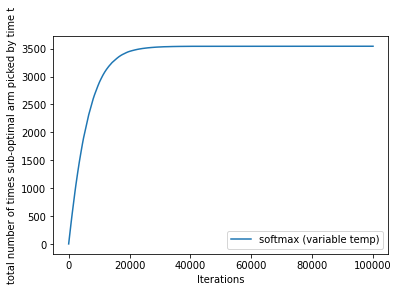

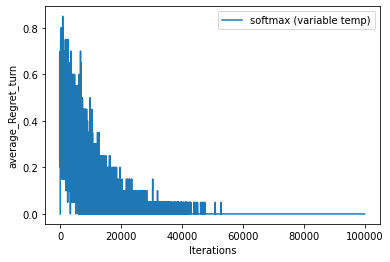

<function matplotlib.pyplot.show>

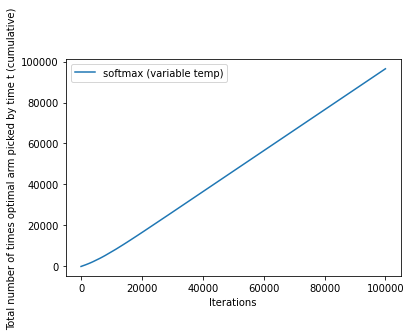

In [ ]:
 ##### Softmax veriable temp######
seed(0)
T, R, N, P = initialization()
regret = np.zeros((T+1, R))  # no of time the suboptimal arm is picked (mu_opt*T-sum(mui*ni),1<i<N)
optimal_arm_pulled = np.zeros((T+1, R))
optimal_arm = P.index(max(P))  # optimal arm



for r in range(R):
    total_reward = 0
    total_optimal = 0
    count_optimal = []
    new_temp = 1
    # initial value calculations
    q_values = [0]*N
    presumed_optimal_arm_temp = softmax_select_arm(q_values,new_temp)
    

    nt_values = [0]*N

    print("softmax (variable temp)", r+1)
    # Reset presumed_optimal_arm for each run
    presumed_optimal_arm = presumed_optimal_arm_temp

    for t in range(1, T+1):
        if(t%100 == 0):
            new_temp = 1/(t/1000) # keep this devision some what higher otherwise may give NAN (e^(x/temp))
        temp = new_temp

        current_reward = bernoulli_sample(P[presumed_optimal_arm])
        selected_arm = presumed_optimal_arm

        if selected_arm == optimal_arm:
            optimal_arm_pulled[t,r] = 1
            
        else:
            regret[t, r] = 1
        

        # Re-calculate presumed_optimal_arm
        q_n_1 = q_values[selected_arm]
        nt_values[selected_arm] = nt_values[selected_arm] + 1
        q_values[selected_arm] = # write the recursive q update equation here
        presumed_optimal_arm = # call softmax select arm with appropriate parameter
    
sv_cum_reg,sv_avg_reg,sv_cum_opt=performance(regret,optimal_arm_pulled)

plt.plot(sv_cum_reg, label='softmax (variable temp)')
plt.xlabel('Iterations')
plt.ylabel('total number of times sub-optimal arm picked by time t')
plt.legend()
plt.show()

plt.plot(sv_avg_reg, label='softmax (variable temp)')
plt.xlabel('Iterations')
plt.ylabel('average_Regret_turn')
plt.legend()
plt.show()

plt.plot(sv_cum_opt, label='softmax (variable temp)')
plt.xlabel('Iterations')
plt.ylabel('Total number of times optimal arm picked by time t (cumulative)')
plt.legend()
plt.show




# 3) UCB (Upper confidence bound)

$A_{t}(a)=q_{t}(a)+\sqrt{\frac{2ln (t)}{N(a)}}$

$Action_{arm}=arg \max_{a} A_{t}(a)$

In [ ]:
def ucb_select_arm(q,nt_values,t):
  A=[0]*len(q)
  for k in range(len(q)):
            A[k] = # insert the equation here
  current_best = # insert the equation here
  return current_best



In [ ]:
 ##### UCB######
seed(0)
T, R, N, P = initialization()
regret = np.zeros((T+1, R))  # no of time the suboptimal arm is picked (mu_opt*T-sum(mui*ni),1<i<N)
optimal_arm_pulled = np.zeros((T+1, R))
optimal_arm = P.index(max(P))  # optimal arm

In [ ]:
# for checking only 
# q_values = [0]*N
# nt_values = [0]*N
# for l in range(N):
#       current_reward=bernoulli_sample(P[l])
#       nt_values[l] = nt_values[l] + 1
#       q_values[l] = q_n_1 + ((current_reward-q_n_1)/(nt_values[l]))
# print(nt_values)

UCB 1
UCB 2
UCB 3
UCB 4
UCB 5
UCB 6
UCB 7
UCB 8
UCB 9
UCB 10
UCB 11
UCB 12
UCB 13
UCB 14
UCB 15
UCB 16
UCB 17
UCB 18
UCB 19
UCB 20


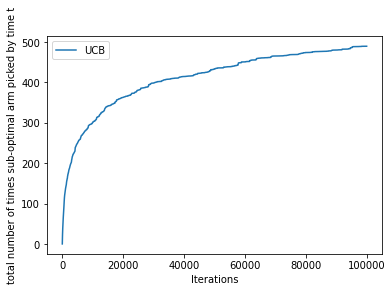

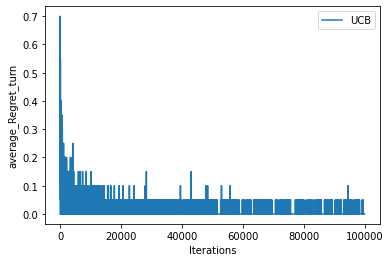

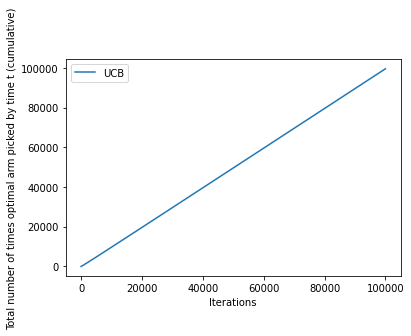

In [ ]:


for r in range(R):
    total_reward = 0
    total_optimal = 0
    count_optimal = []

    # initial value calculations
    q_values = [0]*N
    nt_values = [0]*N
    for l in range(N):
      current_reward=bernoulli_sample(P[l])
      nt_values[l] = nt_values[l] + 1
      q_values[l] = q_n_1 + ((current_reward-q_n_1)/(nt_values[l]))
    


    presumed_optimal_arm_temp = ucb_select_arm(q_values,nt_values,1)

    

    print("UCB", r+1)
    # Reset presumed_optimal_arm for each run
    presumed_optimal_arm = presumed_optimal_arm_temp

    for t in range(1, T+1):

        current_reward = bernoulli_sample(P[presumed_optimal_arm])
        selected_arm = presumed_optimal_arm

        if selected_arm == optimal_arm:
            optimal_arm_pulled[t,r] = 1
            
        else:
            regret[t, r] = 1
        

        # Re-calculate presumed_optimal_arm
        q_n_1 = q_values[selected_arm]
        nt_values[selected_arm] = nt_values[selected_arm] + 1
        q_values[selected_arm] = # write the recursive q update equation here
        presumed_optimal_arm = # call ucb select arm with appropriate parameter
    

ucb_cum_reg,ucb_avg_reg,ucb_cum_opt=performance(regret,optimal_arm_pulled)

plt.plot(ucb_cum_reg, label='UCB')
plt.xlabel('Iterations')
plt.ylabel('total number of times sub-optimal arm picked by time t')
plt.legend()
plt.show()

plt.plot(ucb_avg_reg, label='UCB')
plt.xlabel('Iterations')
plt.ylabel('average_Regret_turn')
plt.legend()
plt.show()

plt.plot(ucb_cum_opt, label='UCB')
plt.xlabel('Iterations')
plt.ylabel('Total number of times optimal arm picked by time t (cumulative)')
plt.legend()
plt.show()



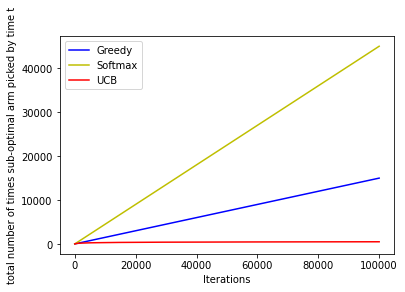

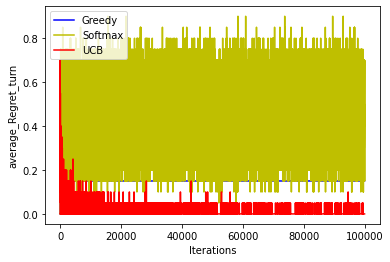

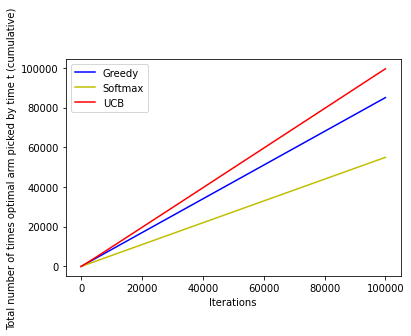

In [ ]:
# comparision (greedy, softmax,ucb)

plt.plot(cum_reg, label='Greedy',color='b')
plt.plot(s_cum_reg, label='Softmax',color='y')
plt.plot(ucb_cum_reg, label='UCB',color='r')
plt.xlabel('Iterations')
plt.ylabel('total number of times sub-optimal arm picked by time t')
plt.legend()
plt.show()

plt.plot(avg_reg, label='Greedy',color='b')
plt.plot(s_avg_reg, label='Softmax',color='y')
plt.plot(ucb_avg_reg, label='UCB',color='r')
plt.xlabel('Iterations')
plt.ylabel('average_Regret_turn')
plt.legend()
plt.show()

plt.plot(cum_opt, label='Greedy',color='b')
plt.plot(s_cum_opt, label='Softmax',color='y')
plt.plot(ucb_cum_opt, label='UCB',color='r')
plt.xlabel('Iterations')
plt.ylabel('Total number of times optimal arm picked by time t (cumulative)')
plt.legend()
plt.show()



# Thompson Sampling:

1) Sample from beta distribution with parameter ($\alpha$,$\beta$) for all the arms (initialize $\alpha=\beta=1$)

2) Find the selected arm having highest sample value

3) Compute the reward using selected arm: if 1 increase the parameters of selected arm i.e. $\alpha$ by 1 else increase $\beta$ by 1.

In [ ]:
import scipy.stats as stats

def sampleBetaDistribution(parameter):
    return np.random.beta(parameter[0], parameter[1])

def thomp_select_arm(parameters):
  samples = list(map(sampleBetaDistribution, parameters))
  index = # insert your code to find the index of selected arm here
  return index


def plot_beta(parameters):
 for i in range(N):

  pri=stats.beta(parameters[i,0],parameters[i,1])
  x=np.linspace(0,1,100)
  y=pri.pdf(x)
  plt.plot(x,y)
  #plt.legend(['1','2','3','4','5'])
  plt.legend(np.linspace(1,N,N))



run Thompson 1
run Thompson 2
run Thompson 3
run Thompson 4
run Thompson 5
run Thompson 6
run Thompson 7
run Thompson 8
run Thompson 9
run Thompson 10
run Thompson 11
run Thompson 12
run Thompson 13
run Thompson 14
run Thompson 15
run Thompson 16
run Thompson 17
run Thompson 18
run Thompson 19
run Thompson 20


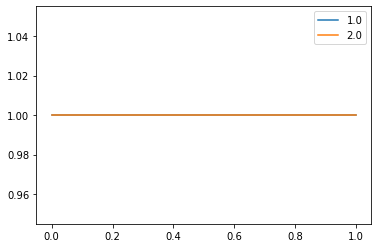

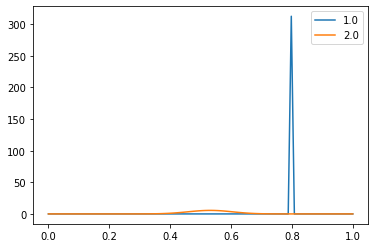

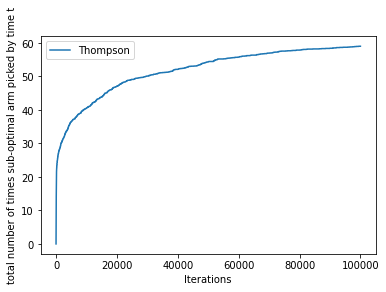

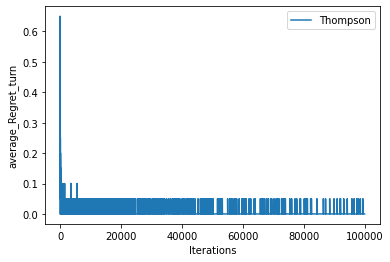

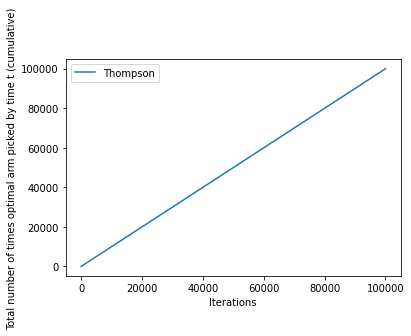

In [ ]:
 ##### Thompson ######
seed(0)
T, R, N, P = initialization()
regret = np.zeros((T+1, R))  # no of time the suboptimal arm is picked (mu_opt*T-sum(mui*ni),1<i<N)
optimal_arm_pulled = np.zeros((T+1, R))
optimal_arm = P.index(max(P))  # optimal arm
parameters = np.ones(shape=(N, 2)) # only for ploting
plt.figure()
plot_beta(parameters)


for r in range(R):
    total_reward = 0
    total_optimal = 0
    parameters = np.ones(shape=(N, 2)) # to store the alpha and beta values for all the arms
# Arm selection initially
    presumed_optimal_arm_temp = thomp_select_arm(parameters)

    

    print("run Thompson", r+1)
    # Reset presumed_optimal_arm for each run
    presumed_optimal_arm = presumed_optimal_arm_temp

    for t in range(1, T+1):

        current_reward = bernoulli_sample(P[presumed_optimal_arm])
        selected_arm = presumed_optimal_arm

        if selected_arm == optimal_arm:
            optimal_arm_pulled[t,r] = 1
            
        else:
            regret[t, r] = 1
        
# for thompson sampling parameter update
        if(current_reward == 1): # heads
            parameters[selected_arm, 0] = # insert your code here
        else: # tails
            parameters[selected_arm, 1] = # insert your code here



        presumed_optimal_arm = thomp_select_arm(parameters)
    

plt.figure()
plot_beta(parameters)
t_cum_reg,t_avg_reg,t_cum_opt=performance(regret,optimal_arm_pulled)

plt.figure()
plt.plot(t_cum_reg, label='Thompson')
plt.xlabel('Iterations')
plt.ylabel('total number of times sub-optimal arm picked by time t')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_avg_reg, label='Thompson')
plt.xlabel('Iterations')
plt.ylabel('average_Regret_turn')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_cum_opt, label='Thompson')
plt.xlabel('Iterations')
plt.ylabel('Total number of times optimal arm picked by time t (cumulative)')
plt.legend()
plt.show()



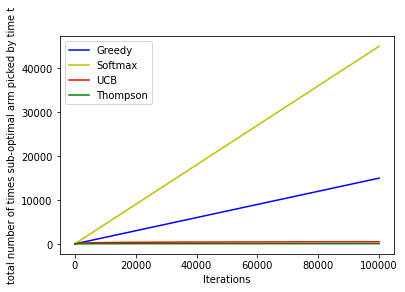

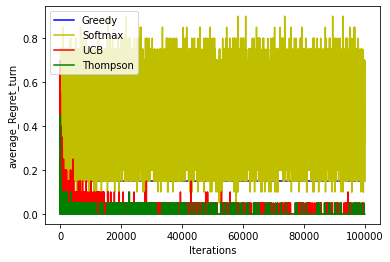

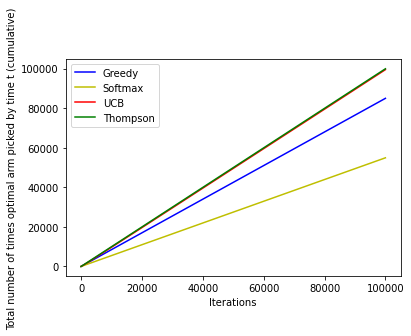

In [ ]:
# comparision (greedy, softmax,ucb,Thompson)

plt.plot(cum_reg, label='Greedy',color='b')
plt.plot(s_cum_reg, label='Softmax',color='y')
plt.plot(ucb_cum_reg, label='UCB',color='r')
plt.plot(t_cum_reg, label='Thompson',color='g')
plt.xlabel('Iterations')
plt.ylabel('total number of times sub-optimal arm picked by time t')
plt.legend()
plt.show()

plt.plot(avg_reg, label='Greedy',color='b')
plt.plot(s_avg_reg, label='Softmax',color='y')
plt.plot(ucb_avg_reg, label='UCB',color='r')
plt.plot(t_avg_reg, label='Thompson',color='g')
plt.xlabel('Iterations')
plt.ylabel('average_Regret_turn')
plt.legend()
plt.show()

plt.plot(cum_opt, label='Greedy',color='b')
plt.plot(s_cum_opt, label='Softmax',color='y')
plt.plot(ucb_cum_opt, label='UCB',color='r')
plt.plot(t_cum_opt, label='Thompson',color='g')
plt.xlabel('Iterations')
plt.ylabel('Total number of times optimal arm picked by time t (cumulative)')
plt.legend()
plt.show()



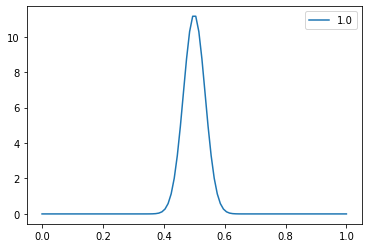

In [ ]:
  pri=stats.beta(100,100)
  x=np.linspace(0,1,100)
  y=pri.pdf(x)
  plt.plot(x,y)
  #plt.legend(['1','2','3','4','5'])
  plt.legend(np.linspace(1,N,N))


# Reinforce 

$P\{A_{t}=a\}=\frac{e^{H_{t}(a)}}{\sum_{b=1}^{n}e^{H_{t}(b)}}=\pi_{t}(a)$

$H_{t+1}(A_{t})=H_{t}(A_{t})+\alpha(baseline-avg rwd)(1-\pi_{t}(A_{t}))$

for $\forall a \neq A_{t}$:

$H_{t+1}(a)=H_{t}(A_{t})-\alpha(baseline-avg rwd)\pi_{t}(a)$

In [ ]:
# Reinforce 
seed(0)
no_baseline = True #(use true or false for using baseline or not)
step_size = 0.1
T, R, N, P = initialization()

regret = np.zeros((T+1, R))  # no of time the suboptimal arm is picked (mu_opt*T-sum(mui*ni),1<i<N)
optimal_arm_pulled = np.zeros((T+1, R))
optimal_arm = P.index(max(P))  # optimal arm



for r in range(R):
    print("run reinforce (baseline)", r+1)
    H = np.zeros(N)
    P = np.ones(N) / N
    avg_reward = 0
    total_reward = 0
    for t in range(1, T + 1):
        selected_arm = np.random.choice(N, 1, p=P)[0]  # arm selection
        #print(A)
        #print(regret)
        if selected_arm==optimal_arm:
          optimal_arm_pulled[t,r]=1
        else:
          regret[t,r]=1

        current_reward = bernoulli_sample(p[selected_arm])
        total_reward += current_reward

        avg_reward = avg_reward + (1.0 / t) * (current_reward - avg_reward)

        baseline = 0.0 if no_baseline else avg_reward

        # Reinforce equation
        H[selected_arm] = # insert your code here       

        for a in range(N):
            if a != selected_arm:
                H[a] = # insert your code here 
        
        aux_exp = np.exp(H)
        P = # insert your code here  # updating P value

r_cum_reg,r_avg_reg,r_cum_opt=performance(regret,optimal_arm_pulled) 
plt.figure()
plt.plot(r_cum_reg, label='Reinforce')
plt.xlabel('Iterations')
plt.ylabel('total number of times sub-optimal arm picked by time t')
plt.legend()
plt.show()

plt.figure()
plt.plot(r_avg_reg, label='Reinforce')
plt.xlabel('Iterations')
plt.ylabel('average_Regret_turn')
plt.legend()
plt.show()

plt.figure()
plt.plot(r_cum_opt, label='Reinforce')
plt.xlabel('Iterations')
plt.ylabel('Total number of times optimal arm picked by time t (cumulative)')
plt.legend()
plt.show()



run reinforce (baseline) 1


NameError: ignored

In [ ]:
#Comparision

plt.plot(cum_reg, label='Greedy',color='b')
plt.plot(s_cum_reg, label='Softmax',color='y')
plt.plot(ucb_cum_reg, label='UCB',color='r')
plt.plot(t_cum_reg, label='Thompson',color='g')
plt.plot(r_cum_reg, label='Reinforce',color='k')
plt.xlabel('Iterations')
plt.ylabel('total number of times sub-optimal arm picked by time t')
plt.legend()
plt.show()

plt.plot(avg_reg, label='Greedy',color='b')
plt.plot(s_avg_reg, label='Softmax',color='y')
plt.plot(ucb_avg_reg, label='UCB',color='r')
plt.plot(t_avg_reg, label='Thompson',color='g')
plt.plot(r_avg_reg, label='Reinforce',color='k')
plt.xlabel('Iterations')
plt.ylabel('average_Regret_turn')
plt.legend()
plt.show()

plt.plot(cum_opt, label='Greedy',color='b')
plt.plot(s_cum_opt, label='Softmax',color='y')
plt.plot(ucb_cum_opt, label='UCB',color='r')
plt.plot(t_cum_opt, label='Thompson',color='g')
plt.plot(r_cum_opt, label='Reinforce',color='k')
plt.xlabel('Iterations')
plt.ylabel('Total number of times optimal arm picked by time t (cumulative)')
plt.legend()
plt.show()

